In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
cp //content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
ls

chest_xray/  chest-xray-pneumonia.zip  drive/  sample_data/


In [ ]:
ls chest_xray/

chest_xray/  __MACOSX/  test/  train/  val/


In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import random
import os
import glob
import cv2
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import backend as K
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, average_precision_score, f1_score, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, precision_score, recall_score, confusion_matrix
from sklearn.utils import resample
from tensorflow.random import set_seed
set_seed(42)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = "chest_xray/train"
test_path = "chest_xray/test"
val_path = "chest_xray/val"

In [ ]:
train_directories = os.listdir(train_path)
print('The labels in Train class are:', train_directories)
test_directories = os.listdir(test_path)
print('The labels in Test class are:', test_directories)
val_directories = os.listdir(val_path)
print('The labels in Val class are:', val_directories)


The labels in Train class are: ['NORMAL', 'PNEUMONIA']
The labels in Test class are: ['NORMAL', 'PNEUMONIA']
The labels in Val class are: ['NORMAL', 'PNEUMONIA']


In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

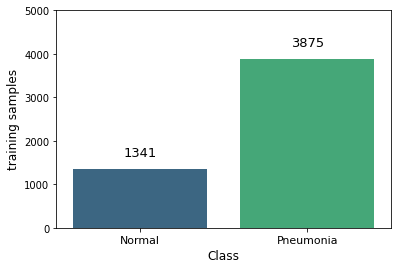

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='Pneumonia', data=df_train, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("training samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

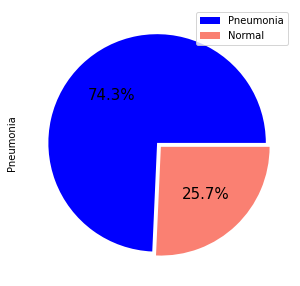

In [ ]:
plt.figure(figsize=(7,5))

df_train['Pneumonia'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

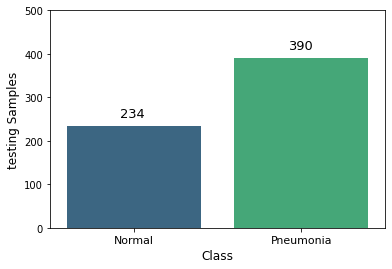

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='Pneumonia', data=df_test, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("testing Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

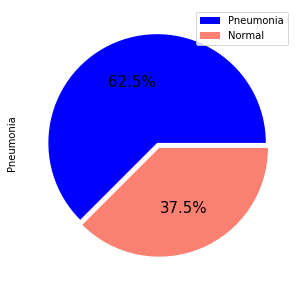

In [ ]:

plt.figure(figsize=(7,5))

df_test['Pneumonia'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

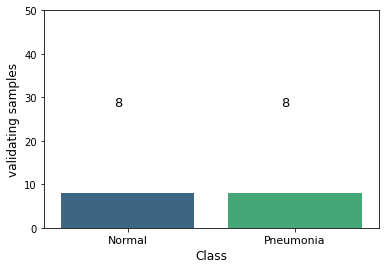

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='Pneumonia', data=df_val, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("validating samples", fontsize= 12)
plt.ylim(0,50)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

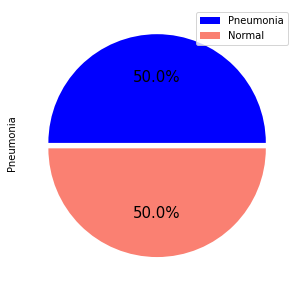

In [ ]:
plt.figure(figsize=(7,5))

df_val['Pneumonia'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set - Normal


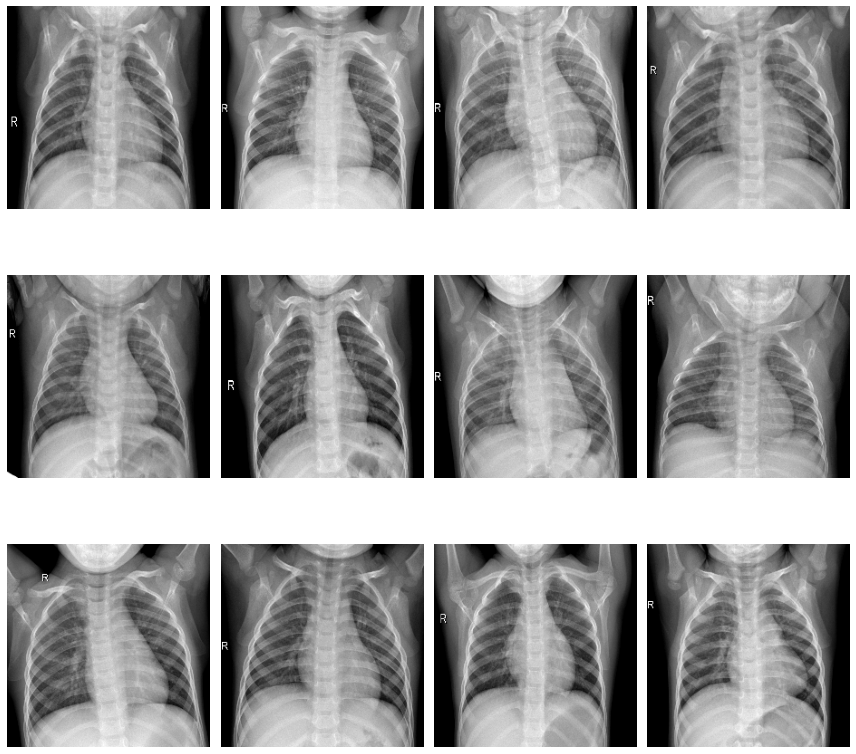

In [ ]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


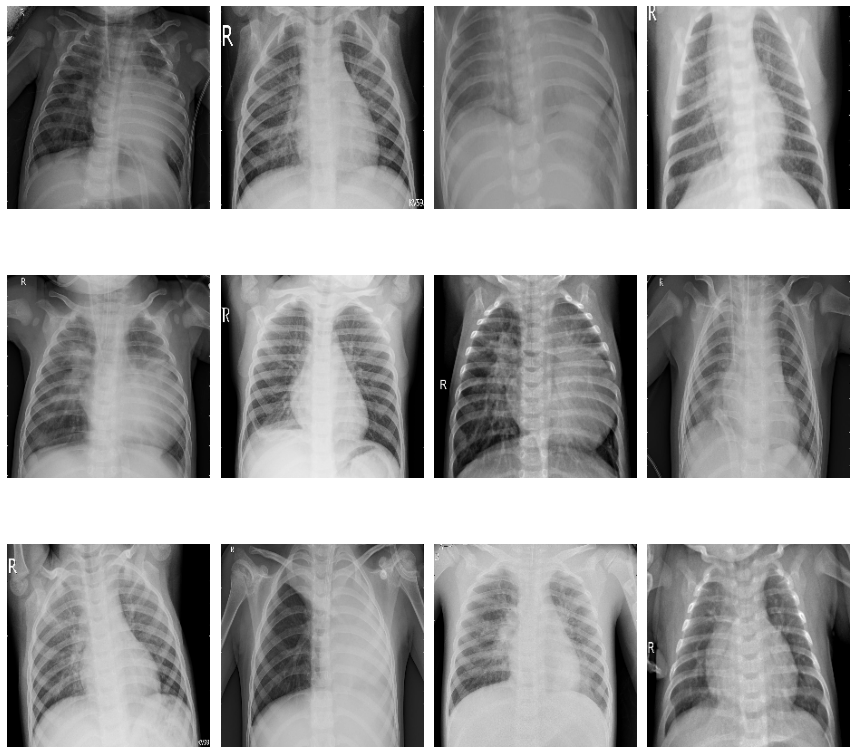

In [ ]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


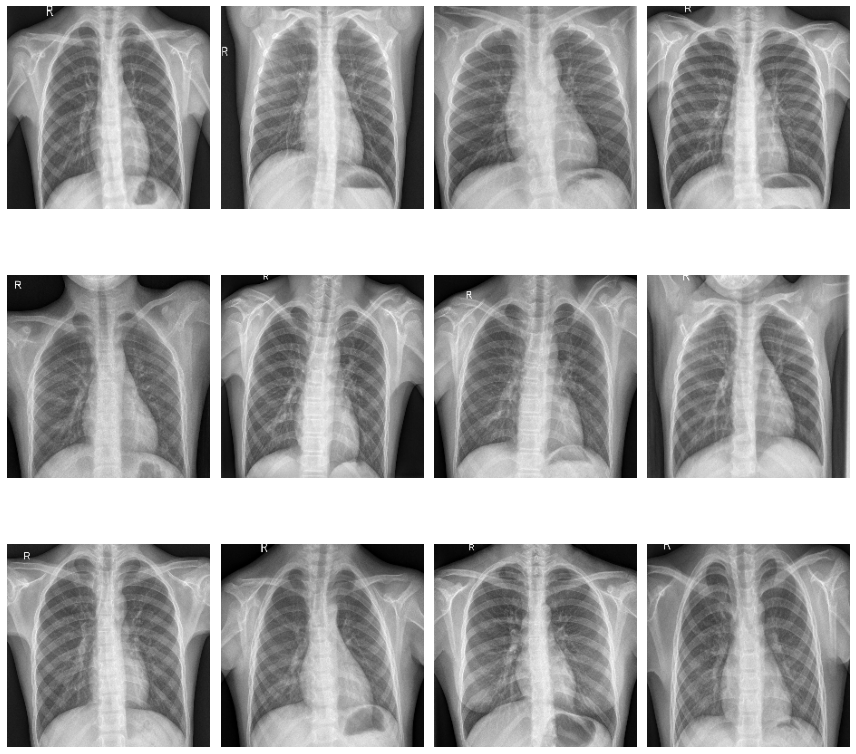

In [ ]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


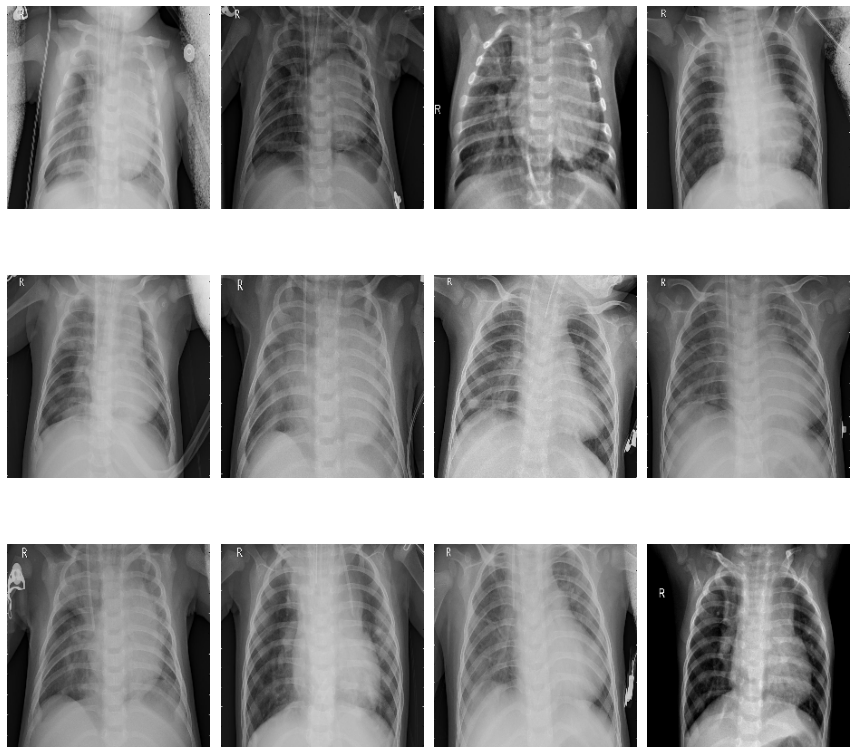

In [ ]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Val Set - Normal


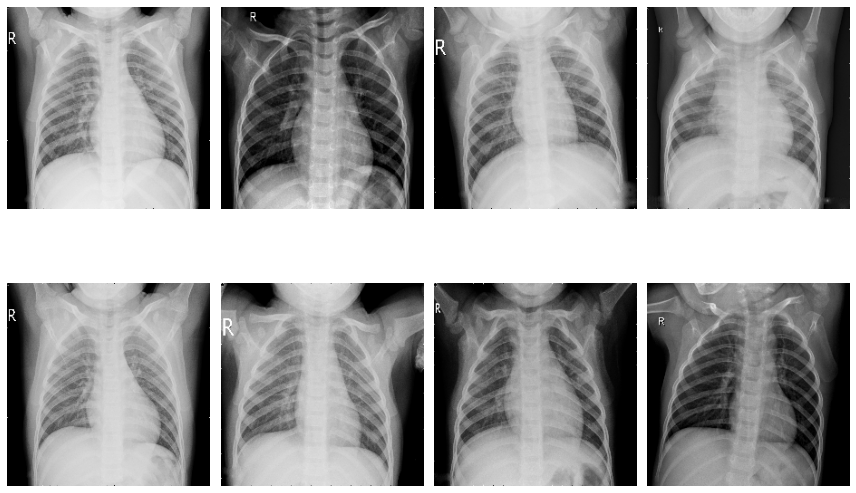

In [ ]:
print('Val Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, len(val_normal)):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(val_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

val Set - Pneumonia


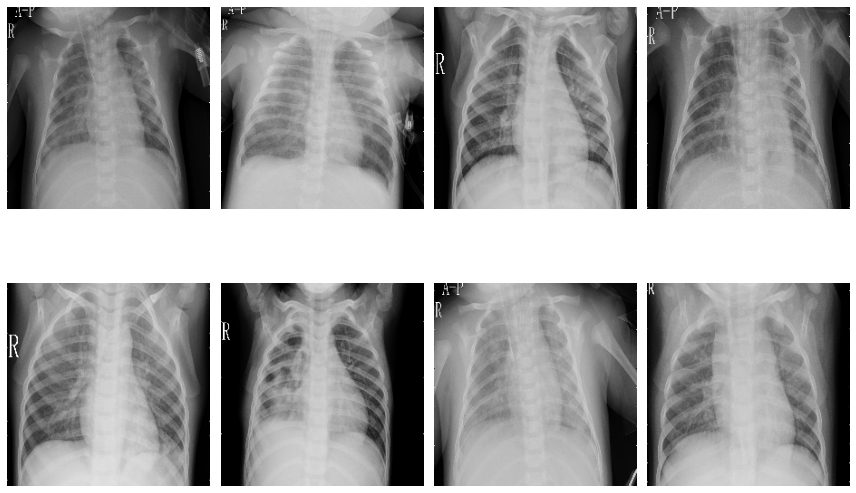

In [ ]:
print('val Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, len(val_pneumonia)):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(val_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
from glob import glob
import random
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import backend as K

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, average_precision_score, f1_score, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, precision_score, recall_score, confusion_matrix
from sklearn.utils import resample

import tensorflow as tf

# Optional pandas configuration for better dataframe readibility
pd.set_option("display.max_columns", None)

In [ ]:
df_train

Pneumonia  \
0             0   
1             0   
2             0   
3             0   
4             0   
...         ...   
5211          1   
5212          1   
5213          1   
5214          1   
5215          1   

                                                                                           image  
0               /content/drive/MyDrive/mini project/Data set/train/NORMAL/IM-0525-0001-0002.jpeg  
1                    /content/drive/MyDrive/mini project/Data set/train/NORMAL/IM-0524-0001.jpeg  
2                    /content/drive/MyDrive/mini project/Data set/train/NORMAL/IM-0523-0001.jpeg  
3               /content/drive/MyDrive/mini project/Data set/train/NORMAL/IM-0525-0001-0001.jpeg  
4                    /content/drive/MyDrive/mini project/Data set/train/NORMAL/IM-0528-0001.jpeg  
...                                                                                          ...  
5211  /content/drive/MyDrive/mini project/Data set/train/PNEUMONIA/person1413_bacteria_3620.jpeg  
5212  /content/drive/MyDrive/mini project/Data set/train/PNEUMONIA/person1414_bacteria_3627.jpeg  
5213  /content/drive/MyDrive/mini project/Data set/train/PNEUMONIA/person1418_bacteria_3638.jpeg  
5214     /content/drive/MyDrive/mini project/Data set/train/PNEUMONIA/person1414_virus_2424.jpeg  
5215  /content/drive/MyDrive/mini project/Data set/train/PNEUMONIA/person1418_bacteria_3639.jpeg  

[5216 rows x 2 columns]

In [ ]:
train_pos_resampled = resample(df_train[df_train["Pneumonia"] == 0],
                              n_samples= len(df_train[df_train["Pneumonia"] == 0]) ,
                              random_state=1000)

In [ ]:
train_data = pd.concat([df_train, train_pos_resampled])

In [ ]:
df_train['Pneumonia'].value_counts()

1    3875
0    1341
Name: Pneumonia, dtype: int64

In [ ]:
train_neg_resampled = resample(train_data[train_data["Pneumonia"] == 1],
                               n_samples=train_data[train_data["Pneumonia"] == 0].shape[0],
                               random_state=1000)

In [ ]:
train_data = pd.concat((train_data[train_data["Pneumonia"] == 0], train_neg_resampled))

In [ ]:
train_data['Pneumonia'].value_counts()

0    2682
1    2682
Name: Pneumonia, dtype: int64

### Data Augmentation and Normalization

In [ ]:
train_idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = False,
                              vertical_flip = False,
                              height_shift_range = 0.1,
                              width_shift_range = 0.1,
                              rotation_range = 3,
                              shear_range = 0.1,
                              zoom_range=0.1,
                              fill_mode='nearest',
                              brightness_range=[0.9,1.1])

In [ ]:
val_test_idg = ImageDataGenerator(rescale=1. / 255.)

In [ ]:
train_gen = train_idg.flow_from_dataframe(dataframe=train_data,
                                     directory=None,
                                     x_col = 'image',
                                     y_col = 'Pneumonia',
                                     class_mode = 'raw',
                                     target_size = (224, 224),
                                     batch_size = 64,
                                     seed=1000)

Found 5364 validated image filenames.


In [ ]:
val_gen = val_test_idg.flow_from_dataframe(dataframe=df_val,
                                         directory=None,
                                         x_col = 'image',
                                         y_col = 'Pneumonia',
                                         class_mode = 'raw',
                                         target_size = (224, 224),
                                         batch_size = 64,
                                         seed=1000)

Found 16 validated image filenames.


In [ ]:
test_gen = val_test_idg.flow_from_dataframe(dataframe=df_test,
                                         directory=None,
                                         x_col = 'image',
                                         y_col = 'Pneumonia',
                                         class_mode = 'raw',
                                         target_size = (224, 224),
                                         batch_size = 64,
                                         seed=1000)

Found 624 validated image filenames.


In [ ]:
testX, testY = test_gen.next()

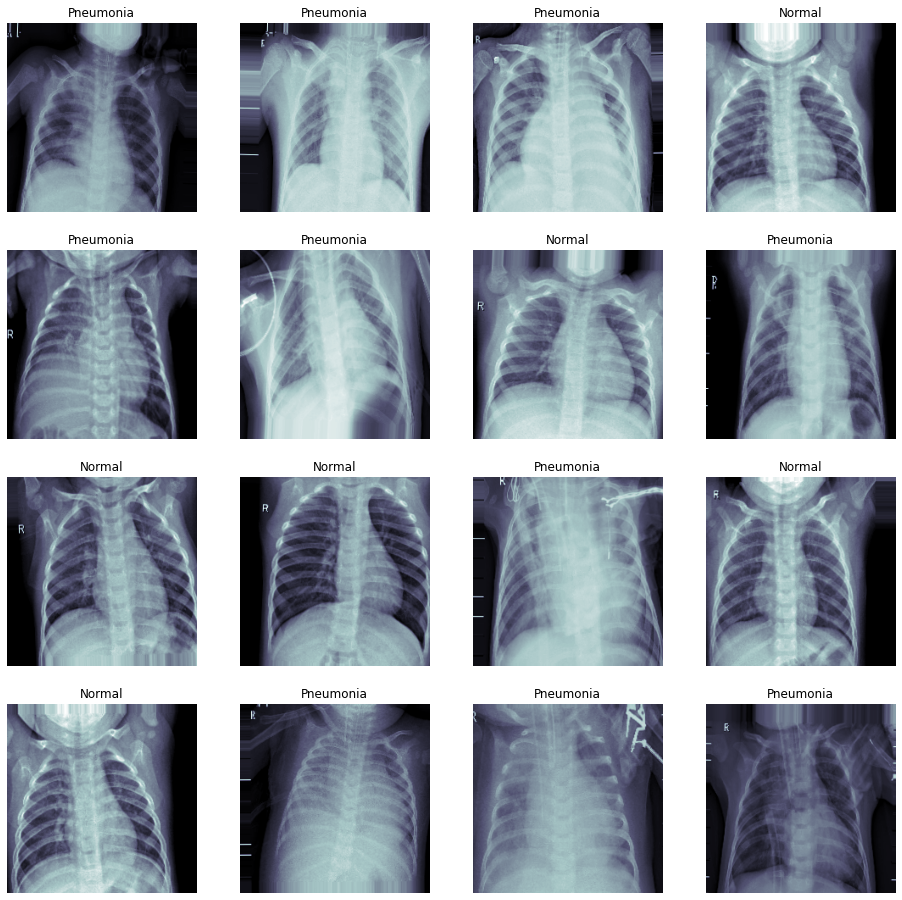

In [ ]:
# Glimpse at the augmented data
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y ==1:
        c_ax.set_title('Pneumonia')
    else:
        c_ax.set_title('Normal')
    c_ax.axis('off')

In [ ]:
# Load pretrained VGG and freeze all but the last convolutional layer

def load_pretrained_model():

    vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

    for layer in vgg_model.layers:
        if layer.name == "block5_conv3":
            layer.trainable = True
        else:
            layer.trainable = False

    return vgg_model

In [ ]:
vgg_model = load_pretrained_model()

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
def build_model(vgg_model, units=[128], dropout=0.2):

    x = GlobalAveragePooling2D()(vgg_model.output)

    for i in range(len(units)):
        x = Dense(units[i], activation="relu", name='fc'+str(i+1))(x)
        x = Dropout(dropout)(x)

    x = Dense(1, activation='sigmoid', name='predictions')(x)

    model = Model(inputs= vgg_model.input, outputs=x)

    optimizer = Adam(lr=3e-3)
    loss = 'binary_crossentropy'

    metrics = [tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall'),
               tf.keras.metrics.AUC(name='auc'),
               tf.keras.metrics.BinaryAccuracy(name='binary_accuracy')]

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

In [ ]:
model = build_model(vgg_model, units=[512, 256, 128], dropout=0.5)

In [ ]:
checkpoint = ModelCheckpoint("model.h5",  # "model.{epoch:02d}-{val_loss:.2f}.h5"
                             monitor= 'val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode= 'min',
                             save_weights_only = False)

lr_reduce = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.8,
                              patience=4,
                              verbose=1,
                              mode='min',
                              cooldown=5,
                              min_lr=0.0001)

early = EarlyStopping(monitor= 'val_loss',
                      mode= 'min',
                      patience=30)

callbacks_list = [checkpoint, early, lr_reduce]

In [ ]:
history = model.fit_generator(train_gen,
                              validation_data = val_gen,
                              epochs = 30,
                              callbacks = callbacks_list)

Epoch 1/30
84/84 [==============================] - ETA: 0s - loss: 0.4347 - precision: 0.8445 - recall: 0.8001 - auc: 0.8981 - binary_accuracy: 0.8264 
Epoch 1: val_loss improved from inf to 0.34369, saving model to model.h5
84/84 [==============================] - 2346s 28s/step - loss: 0.4347 - precision: 0.8445 - recall: 0.8001 - auc: 0.8981 - binary_accuracy: 0.8264 - val_loss: 0.3437 - val_precision: 0.7000 - val_recall: 0.8750 - val_auc: 0.9375 - val_binary_accuracy: 0.7500 - lr: 0.0030
Epoch 2/30
84/84 [==============================] - ETA: 0s - loss: 0.1428 - precision: 0.9595 - recall: 0.9444 - auc: 0.9862 - binary_accuracy: 0.9523
Epoch 2: val_loss improved from 0.34369 to 0.32165, saving model to model.h5
84/84 [==============================] - 173s 2s/step - loss: 0.1428 - precision: 0.9595 - recall: 0.9444 - auc: 0.9862 - binary_accuracy: 0.9523 - val_loss: 0.3216 - val_precision: 0.7000 - val_recall: 0.8750 - val_auc: 0.9531 - val_binary_accuracy: 0.7500 - lr: 0.0030
E

In [ ]:
model.load_weights('model.h5')

In [ ]:
def plot_history(hist):

    hist = pd.DataFrame(data=history.history)

    # Plot cost function
    hist.iloc[:,[0,5]].plot()
    plt.title("Model loss during training")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    # Plot accuracy
    hist.iloc[:,[4,9]].plot()
    plt.title("Model accuracy during training")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.show()

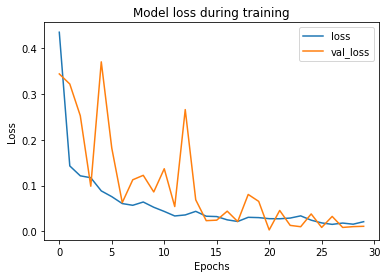

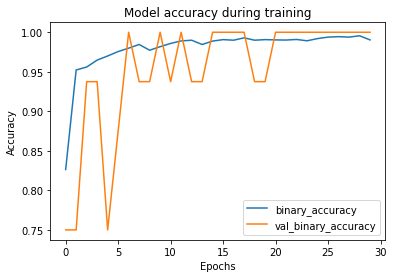

In [ ]:
plot_history(history)

### Analysis of Metrics

In [ ]:
y_pred = model.predict(testX, verbose = True)

15/15 [==============================] - 9s 375ms/step


#### Precision and Recall

In [ ]:
precision, recall, thresholds = precision_recall_curve(testY, y_pred)
avg_precision = average_precision_score(testY, y_pred)
plt.plot(recall, precision, label=f'Model (AP={avg_precision:.2f})', marker='.')
plt.plot([0, 1], [0, 0], linestyle='--', label='Dummy Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall curve")
plt.legend()
plt.show()

#### ROC/AUC

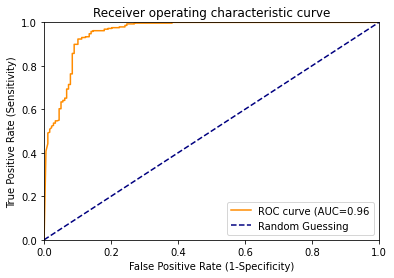

In [ ]:
# This implementation uses trapezoidal rule and linear interpolation, sometimes may be too optimistic

# Calculate Receiver operating characteristic curve (ROC) (points + thresholds)
fpr, tpr, thresholds = roc_curve(testY, y_pred.ravel(), pos_label=1)

# Calculate are under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC={auc_score:.2f}' )
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

#### F1-Score

In [ ]:

def f1_score(p, r):
    if(p == 0 or r == 0):
        return p
    return 2 * p ** r / (p + r)

In [ ]:
# Plot F1-score on different thresholds
precision, recall, thresholds = precision_recall_curve(testY, y_pred)
f1_scores = [f1_score(precision[i], recall[i]) for i in range(len(thresholds))]

# Choose the threshold that optimizes F1-score
thresh_idx = np.argmax(f1_scores)
thresh = thresholds[thresh_idx]

plt.figure()
plt.style.use("ggplot")
plt.plot(thresholds, f1_scores)
plt.xlabel('threshold')
plt.ylabel('f1-score')
plt.title('F1-score on different thresholds')
plt.show()

In [ ]:
print(f"Threshold = {thresh:.2f}")
print(f"Precision = {precision[thresh_idx]:.2f}")
print(f"Recall = {recall[thresh_idx]:.2f}")
print(f"F1-score {f1_scores[thresh_idx]:.2f}")

Threshold = 0.61
Precision = 0.98
Recall = 0.95
F1-score 0.96


#### Confusion Matrix


In [ ]:
# TN FP
# FN TP
confusion_matrix(testY, y_pred > thresh)

array([[19,  2],
       [ 4, 39]])

#### Final Classification Report

In [ ]:
print(sklearn.metrics.classification_report(testY,
                                            [int(i) for i in (y_pred>thresh)],
                                            target_names = ['No Pneumonia','Pneumonia']))

              precision    recall  f1-score   support

No Pneumonia       0.83      0.90      0.86        21
   Pneumonia       0.95      0.91      0.93        43

    accuracy                           0.91        64
   macro avg       0.89      0.91      0.90        64
weighted avg       0.91      0.91      0.91        64



In [ ]:
# Save model architecture
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)